In [73]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [74]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [75]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [76]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [77]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [78]:
len(data)

55

In [79]:
data[0]

array([[[  66., -410.],
        [ 141., -490.],
        [ 167., -530.]],

       [[  -1., -413.],
        [  45., -472.],
        [ 145., -526.]],

       [[ -31., -199.],
        [-219., -183.],
        [  30., -317.]],

       [[   3., -124.],
        [   2.,  -99.],
        [   7., -254.]],

       [[  27., -261.],
        [   5., -230.],
        [   5., -399.]],

       [[ -30., -383.],
        [ -83., -409.],
        [  83., -502.]],

       [[  59., -415.],
        [ 123., -508.],
        [ 131., -534.]]])

In [80]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [81]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [82]:
Y.shape

(55, 6, 3, 2)

In [83]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test[0]
Y_test=Y_test[0]

In [84]:
X_test.shape

(6, 3, 2)

In [85]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
minimum_loss = float('inf')
for epoch in range(200):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
    l0.append(model.evaluate(X_test, Y_test))
    if l0[-1] < minimum_loss:
            minimum_loss = l0[-1]
            model.save('best.h5')

1/1 [==============================] - 0s 21ms/step - loss: 4090.0217


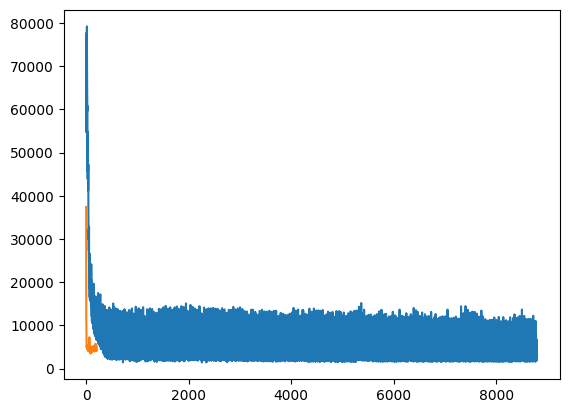

In [86]:
plt.plot(l)
plt.plot(l0)
plt.show()

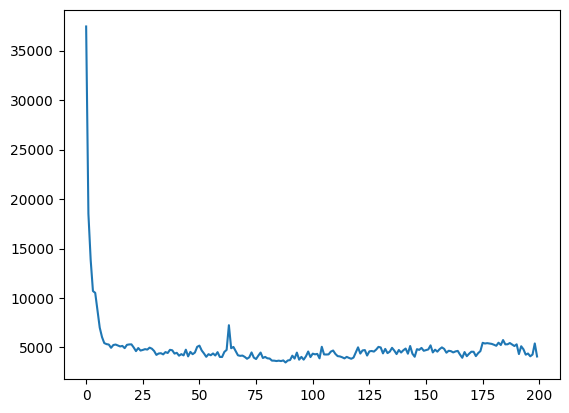

In [87]:
plt.plot(l0)

In [88]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

best epoch: 3483.961669921875 best batch: 1410.79150390625


In [89]:
l0[-1]

4090.021728515625

In [90]:
model.save('last.h5')

In [91]:
data[0]

array([[[  66., -410.],
        [ 141., -490.],
        [ 167., -530.]],

       [[  -1., -413.],
        [  45., -472.],
        [ 145., -526.]],

       [[ -31., -199.],
        [-219., -183.],
        [  30., -317.]],

       [[   3., -124.],
        [   2.,  -99.],
        [   7., -254.]],

       [[  27., -261.],
        [   5., -230.],
        [   5., -399.]],

       [[ -30., -383.],
        [ -83., -409.],
        [  83., -502.]],

       [[  59., -415.],
        [ 123., -508.],
        [ 131., -534.]]])

In [92]:
restore_changes(data[0],0,None)

[[[274.0, 523.0], [349.0, 443.0], [375.0, 403.0]],
 [[209.0, 517.0], [255.0, 458.0], [355.0, 404.0]],
 [[188.0, 581.0], [0.0, 597.0], [249.0, 463.0]],
 [[210.0, 653.0], [209.0, 678.0], [214.0, 523.0]],
 [[261.0, 670.0], [239.0, 701.0], [239.0, 532.0]],
 [[209.0, 560.0], [156.0, 534.0], [322.0, 441.0]],
 [[296.0, 527.0], [360.0, 434.0], [368.0, 408.0]]]

In [93]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [104]:
# restore_changes(data[0],0)

In [105]:
model = tf.keras.models.load_model('best.h5')
a= model.predict(data[0]).tolist()

1/1 [==============================] - 0s 108ms/step


In [106]:
a[0]

[[32.714881896972656, -389.96307373046875],
 [61.10493087768555, -438.6085205078125],
 [113.53036499023438, -511.25054931640625]]

In [107]:
data[0]

array([[[  66., -410.],
        [ 141., -490.],
        [ 167., -530.]],

       [[  -1., -413.],
        [  45., -472.],
        [ 145., -526.]],

       [[ -31., -199.],
        [-219., -183.],
        [  30., -317.]],

       [[   3., -124.],
        [   2.,  -99.],
        [   7., -254.]],

       [[  27., -261.],
        [   5., -230.],
        [   5., -399.]],

       [[ -30., -383.],
        [ -83., -409.],
        [  83., -502.]],

       [[  59., -415.],
        [ 123., -508.],
        [ 131., -534.]]])

In [108]:
points = restore_changes(a,0,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for p in f:
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
    cv2.imwrite(f'outputs/output{n}.png', img)